# Anomaly Model Training and Evaluation

Train IsolationForest on windowed DNS activity from simulation.

In [1]:
import json
from pathlib import Path
import matplotlib.pyplot as plt

from sentineldns.data.simulations import write_simulation_jsonl
from sentineldns.features.window_features import aggregate_events_to_windows
from sentineldns.models.anomaly import train_anomaly_model, load_anomaly_bundle, score_window

sim_path = write_simulation_jsonl(Path('../data/simulations/sample.jsonl'))
events = [json.loads(line) for line in sim_path.read_text().splitlines() if line.strip()]
domain_scores = {e['domain']: (80.0 if 'login' in e['domain'] else 10.0) for e in events}
windows = aggregate_events_to_windows(events, domain_scores=domain_scores, window_minutes=5)
len(windows)

9

{'model_version': '20260217T194850Z',
 'contamination': 0.05,
 'train_windows': 9,
 'decision_mean': 0.18038561118590668,
 'decision_std': 0.11169048919365726,
 'features': ['queries_per_min',
  'unique_domains',
  'nxdomain_rate',
  'mean_domain_risk',
  'high_risk_domain_ratio',
  'newly_seen_ratio',
  'periodicity_score'],
 'fallback_method': 'zscore'}

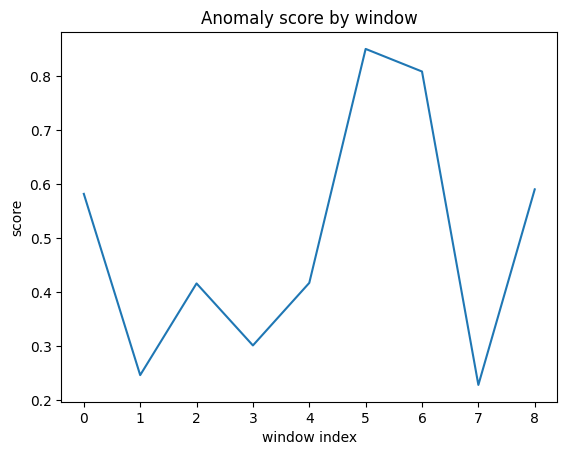

In [2]:
metrics = train_anomaly_model(windows)
bundle = load_anomaly_bundle()
scores = [score_window(w, bundle)['anomaly_score'] for w in windows]
plt.plot(scores)
plt.title('Anomaly score by window')
plt.xlabel('window index')
plt.ylabel('score')
metrics